y =  0.017471154788878687 x1 +  -1.27133616181561e-06 x2 +  6.020545842967522e-10 x3 +  -32.050391153370185


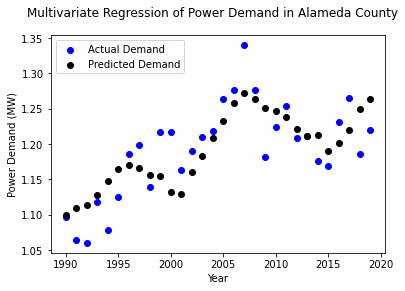

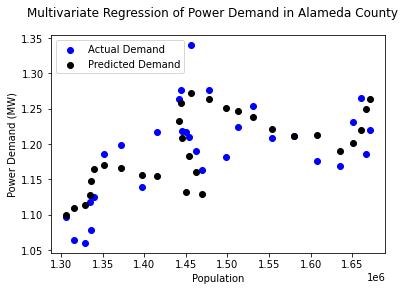

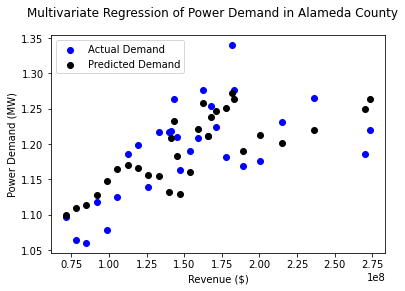

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# change county name accordingly
county_name = "Alameda County"

# to add more features, 1. read csv 2. add county name to dataframe 3. insert
df_population = pd.read_csv("population_all.csv")
df_revenue = pd.read_csv("revenue_all.csv") # 1.
df_population = df_population[["Year", county_name]]
df_revenue = df_revenue[[county_name]] # 2.
X = df_population
X.insert(2, f"{county_name}_Rev", df_revenue[df_revenue.columns[0]]) # 3.

df_demand = pd.read_csv("demand_all.csv")
y = df_demand[[county_name]]

linear_regression = LinearRegression()
linear_regression.fit(X, y)
y_pred = linear_regression.predict(X)


def get_slopes():
    slopes_list = linear_regression.coef_.tolist()

    slopes_str = []
    for element in slopes_list[0]:
        slopes_str.append(str(element))
    for element in slopes_str[0]:
        slopes_str.extend(element.split(','))

    return slopes_str


intercept = linear_regression.intercept_
slopes = get_slopes()

# Change # of slopes to match # of features (length of slopes) accordingly
print("y = ", slopes[0], "x1 + ", slopes[1], "x2 + ", slopes[2], "x3 + ", intercept[0])


def plot_chart(feature_name, feature, target, target_pred, county):
    figure = plt.figure()
    figure.suptitle(f"Multivariate Regression of Power Demand in {county}")
    plt.scatter(x=feature, y=target, color="blue", label="Actual Demand")
    plt.scatter(x=feature, y=target_pred, color="black", label="Predicted Demand")
    plt.xlabel(feature_name)
    plt.ylabel("Power Demand (MW)")
    plt.legend(loc="upper left")


# Adjust features accordingly
features_list = ["Year", "Population", "Revenue ($)"]
for i in range(len(features_list)):
    plot_chart(features_list[i], X.iloc[:, i], y, y_pred, county_name)

plt.show()
